In [78]:
sampleRate =5250
import numpy as np
myfile = np.fromfile('data.bin', dtype='uint16')
print(myfile.shape)

(96012,)


In [79]:
myfile = np.delete(myfile,[0,1,2,3])
myfile = np.delete(myfile,[0,1,2,3])
myfile = np.delete(myfile,[0,1,2,3])
myfile = myfile.reshape(24000,4)
print(myfile[:,1].shape)
#myfile.reshape()

(24000,)


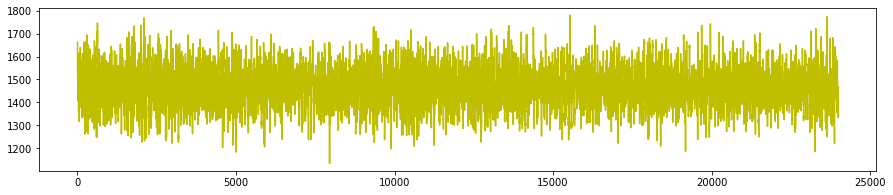

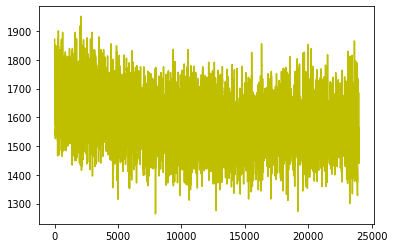

In [80]:
import scipy.io.wavfile as wavf
import matplotlib.pyplot as pp
from scipy import signal
val = 1 # this is the value where you want the data to appear on the y-axis.
# just as an example array

pp.figure(figsize=(15,3))
pp.plot(myfile[:,2], 'y')
pp.show()
pp.plot(myfile[:,3], 'y')
pp.show()



[ 0.19  0.17  0.16 ... -0.08 -0.05 -0.  ]
[0.0021519  0.00170549 0.00124536 ... 0.0033687  0.00298737 0.00258051]


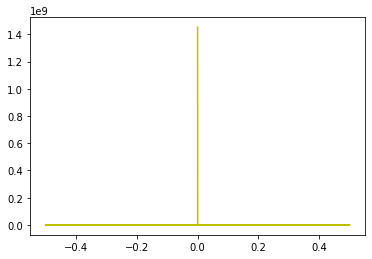

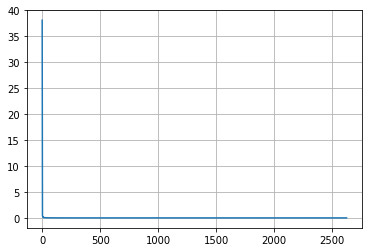

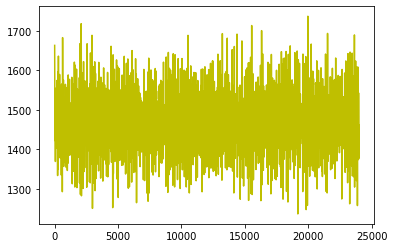

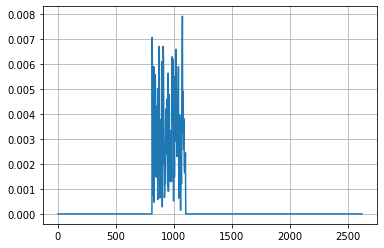

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [81]:

from scipy.io import wavfile
samplerate, fftarray = wavfile.read('out.wav')
sr , NoiseA = wavfile.read('out1.wav')
#fftarray = fftarray[3000:5000] #4257:4275
print(fftarray)
fftResult = np.fft.fft(fftarray)
fftResultNoise = np.fft.fft(NoiseA)
fftResult = fftResult - fftResultNoise
freq = np.fft.fftfreq(24000)
pp.plot(freq, fftResult.real**2 + fftResult.imag**2, 'y')
#pp.plot(fftResult, 'y')
pp.show()
# Number of sample points
N = 2000
# sample spacing
T = 1.0 / sampleRate
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(fftResult[0:N//2]))
plt.grid()
plt.show()
b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, myfile[:,2])
pp.plot(output, 'y', label='filtered') # cutoff frequency
pp.show()

#fftResult[0:165]=0
#fftResult[200:325]=0
fftResult[0:310]=0
fftResult[420:]=0


plt.plot(xf, 2.0/N * np.abs(fftResult[0:N//2]))
plt.grid()
plt.show()
fftResult = np.fft.ifft(fftResult)
print(fftResult.astype(fftarray.dtype))
wavf.write("fftd.wav", sampleRate, fftResult.astype(fftarray.dtype)*40) #25/40/10
pp.show()

In [82]:
samples = np.delete(myfile,[0,1,3],axis=1)
samples=samples.flatten()

samples2 = np.delete(myfile,[0,1,2],axis=1)
samples2=samples2.flatten()
samples3 = np.delete(myfile,[0,2,3],axis=1)
samples3 =samples2.flatten()
print(samples[0])
print(samples2[0])
a1=samples.tolist()
a2=samples2.tolist()
noiseRed = []
av = np.average(samples2)
for i in range(len(a1)):
    noiseRed.append(a1[i]-av)

1662
1872


In [83]:
samples=samples/1000
#samples=samples/1.0
mean = np.mean(samples)
samples = samples - mean
samples = samples.round(2)
print(samples.shape)
xf = np.nonzero(samples > 0.0)

(24000,)


In [84]:
fs = 5250
out_f = 'out.wav'
print(samples)
wavf.write(out_f, fs, samples)

[ 0.19  0.17  0.16 ... -0.08 -0.05 -0.  ]


In [85]:
output=output/100
wavf.write("buttered.wav", fs, output)



In [86]:
samples2=samples2/1000
print(samples2.shape)
fs = sampleRate
out_f = 'out1.wav'
print(samples2)
wavf.write(out_f, fs, samples2)

(24000,)
[1.872 1.838 1.858 ... 1.489 1.54  1.562]


In [87]:
samples3=samples3/1000
print(samples2.shape)
fs = sampleRate
out_f = 'out2.wav'
print(samples2)
wavf.write(out_f, fs, samples2)


(24000,)
[1.872 1.838 1.858 ... 1.489 1.54  1.562]


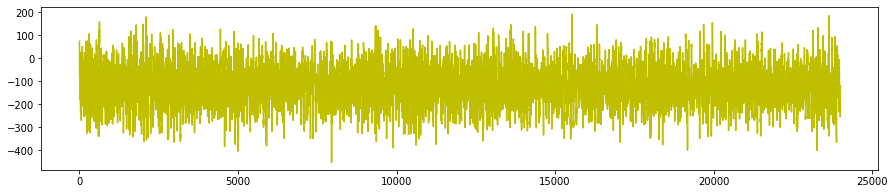

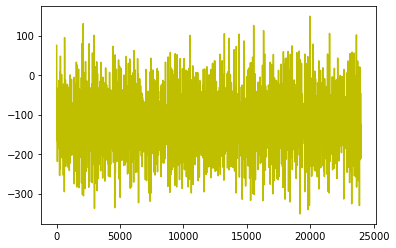

beats per second :  25
beats per minute :  500


In [88]:
pp.figure(figsize=(15,3))
pp.plot(noiseRed, 'y')
pp.show()

b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, noiseRed)
pp.plot(output, 'y', label='filtered') # cutoff frequency
pp.show()
beats=0
cnt=0;
for i in range(len(output)):
    if output[i]>40:
        if cnt==0:
            beats+=1
        cnt+=1
        if cnt >= 15:
            cnt=0
for i in range(4000):
    output = np.insert(output, 0, 0, axis=0)
for i in range(4000):
    output = np.insert(output, len(output)-1, 0, axis=0)

output=output/100
#output=output-np.average(output)
wavf.write("reduced.wav", fs, output)
print("beats per second : ", beats)
print("beats per minute : ", beats*20)